In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# BINOMIAL DISTRIBUTION TEST
# KS H0: The binomial distribution and normal distribution are identical
# AD H0: The sample from the binomial distribtuion is drawn from a normal distribution
# CHI H0: The binomial distribution and normal distribution have the same frequencies

In [8]:
scipy.stats.kstest?

In [9]:
scipy.stats.anderson?

In [10]:
scipy.stats.chisquare?

In [2]:
np.random.seed(999)
narray = range(1,500,1)
ks_s_b = np.zeros(499,dtype=list)
ks_p_b = np.zeros(499,dtype=list)
ad_b = np.zeros(499,dtype=list)
kl_b = np.zeros(499,dtype=list)
chi_s_b = np.zeros(499,dtype=list)
chi_p_b = np.zeros(499,dtype=list)
p=0.5
for i,n in enumerate(narray):
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                   scipy.stats.norm.pdf(bincenters))
    
    chi_s_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_b[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                    scipy.stats.norm.pdf(bincenters))[1]
    

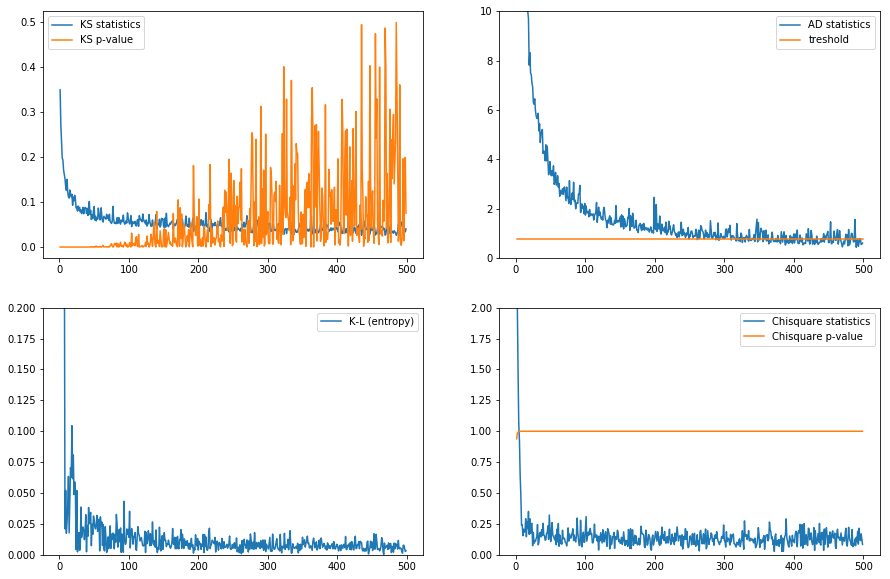

In [12]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(222)
threshold = scipy.stats.anderson(dist, 
                                 dist='norm')[1][scipy.stats.anderson(dist, 
                                                                      dist='norm')[2]==[5.0]]
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) 
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.legend();

fig.add_subplot(224)
pl.plot(narray, chi_s_b, label = 'Chisquare statistics')
pl.plot(narray, chi_p_b, label = 'Chisquare p-value')
pl.ylim(0,2)
pl.legend()

# Figure1
## As np value grows up, the trend of KS p-value is generally going up and the KS statistics decrease and then fluctuate at 0.05; AD statistics decrease and then fluctuate at the treshold value(0.05 significance level); The KL entropy value decrease and then fluctuate at 0.01;The chi statistics decrease and maintain at around 0.125 < p-value.
## So we can say that the larger the np value, the more the binomial distribution and normal distribution are identical.

# POISSON DISTRIBUTION TEST
# KS H0: The poisson distribution and normal distribution are identical
# AD H0: The sample from the poisson distribtuion is drawn from a normal distribution
# CHI H0: The poisson distribution and normal distribution have the same frequencies

In [5]:
np.random.seed(999)
narray = range(1,500,1)
ks_s_p = np.zeros(499,dtype=list)
ks_p_p = np.zeros(499,dtype=list)
ad_p = np.zeros(499,dtype=list)
kl_p = np.zeros(499,dtype=list)
chi_s_p = np.zeros(499,dtype=list)
chi_p_p = np.zeros(499,dtype=list)
for i,n in enumerate(narray):
    dist = (np.random.poisson(n, 1000) - n) / np.sqrt(n)
    ks_s_p[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist,'norm')[1]
    
    ad_p[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_p[i] = ad_p[i] / ad_p[0]
    
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    kl_p[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                   scipy.stats.norm.pdf(bincenters))
    
    chi_s_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_p[i] = scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0] / 1000.,
                                    scipy.stats.norm.pdf(bincenters))[1]
    

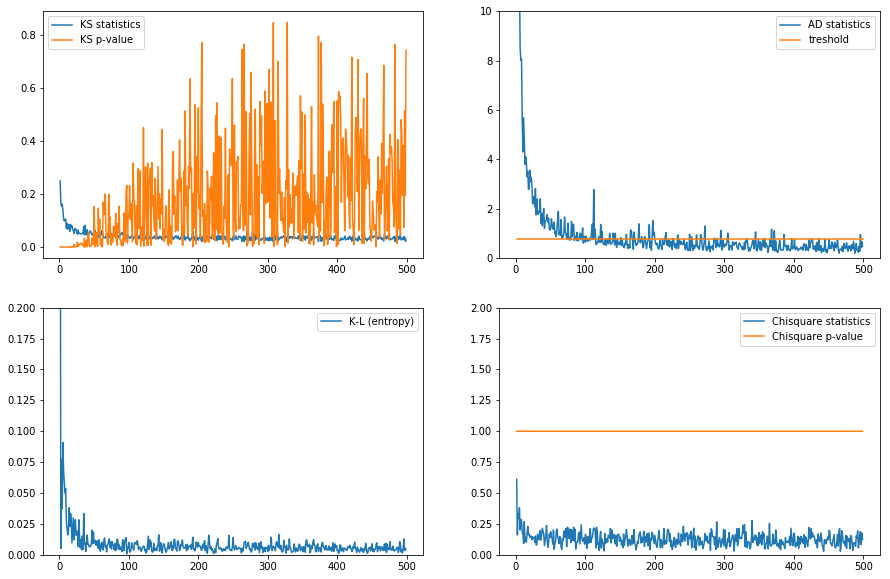

In [14]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='KS p-value')
pl.legend()

fig.add_subplot(222)
threshold = scipy.stats.anderson(dist, 
                                 dist='norm')[1][scipy.stats.anderson(dist, 
                                                                      dist='norm')[2]==[5.0]]
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) 
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.ylim(0,0.2)
pl.legend();

fig.add_subplot(224)
pl.plot(narray, chi_s_p, label = 'Chisquare statistics')
pl.plot(narray, chi_p_p, label = 'Chisquare p-value')
pl.ylim(0,2)
pl.legend()

# Figure2
## As n value grows up, the trend of KS p-value is generally going up and the KS statistics decrease and then fluctuate at 0.05; AD statistics decrease and then fluctuate at the treshold value(0.05 significance level); The KL entropy value decrease and then fluctuate at 0.01;The chi statistics decrease and maintain at around 0.125 < p-value.
## So we can say that the larger the n value, the more the poisson distribution and normal distribution are identical.